In [1]:
import os
import pandas
import numpy
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pandas.read_csv('nb_first_interactive_cell.csv')
df.head()

,Filename,H,SequenceNumber,HLevel,T,TSequenceNumber,TDetail
0,serve/light/0da910e07f879f767a4854da9d8edbcda2...,Heading,0.0,1.0,NaN,NaN,NaN
1,serve/light/06658bdce9e03ef4b87a51deb33bda002a...,Heading,0.0,1.0,NaN,NaN,NaN
2,serve/light/505afc3b274e1b0ef3579349ed1ad0a411...,Heading,0.0,1.0,NaN,NaN,NaN
3,serve/light/6e27cc2db681d4e59de933fa96082a0fa1...,Heading,0.0,1.0,NaN,NaN,NaN
4,serve/light/1c5237444b03bfdf01af1100967a702097...,Heading,0.0,1.0,NaN,NaN,NaN


In [3]:
print(df.shape)

(74458, 7)


In [4]:
data = df[(df['H'] == 'Heading')].groupby(['HLevel', 'SequenceNumber']).agg({'SequenceNumber': 'count'})

In [5]:
table_data = df[(df['T'] == 'Table')].groupby('TSequenceNumber').agg({'TSequenceNumber': 'count'})
df.columns = ["_".join(x) for x in df.columns.ravel()]

/tmp/ipykernel_134195/1962729589.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  df.columns = ["_".join(x) for x in df.columns.ravel()]


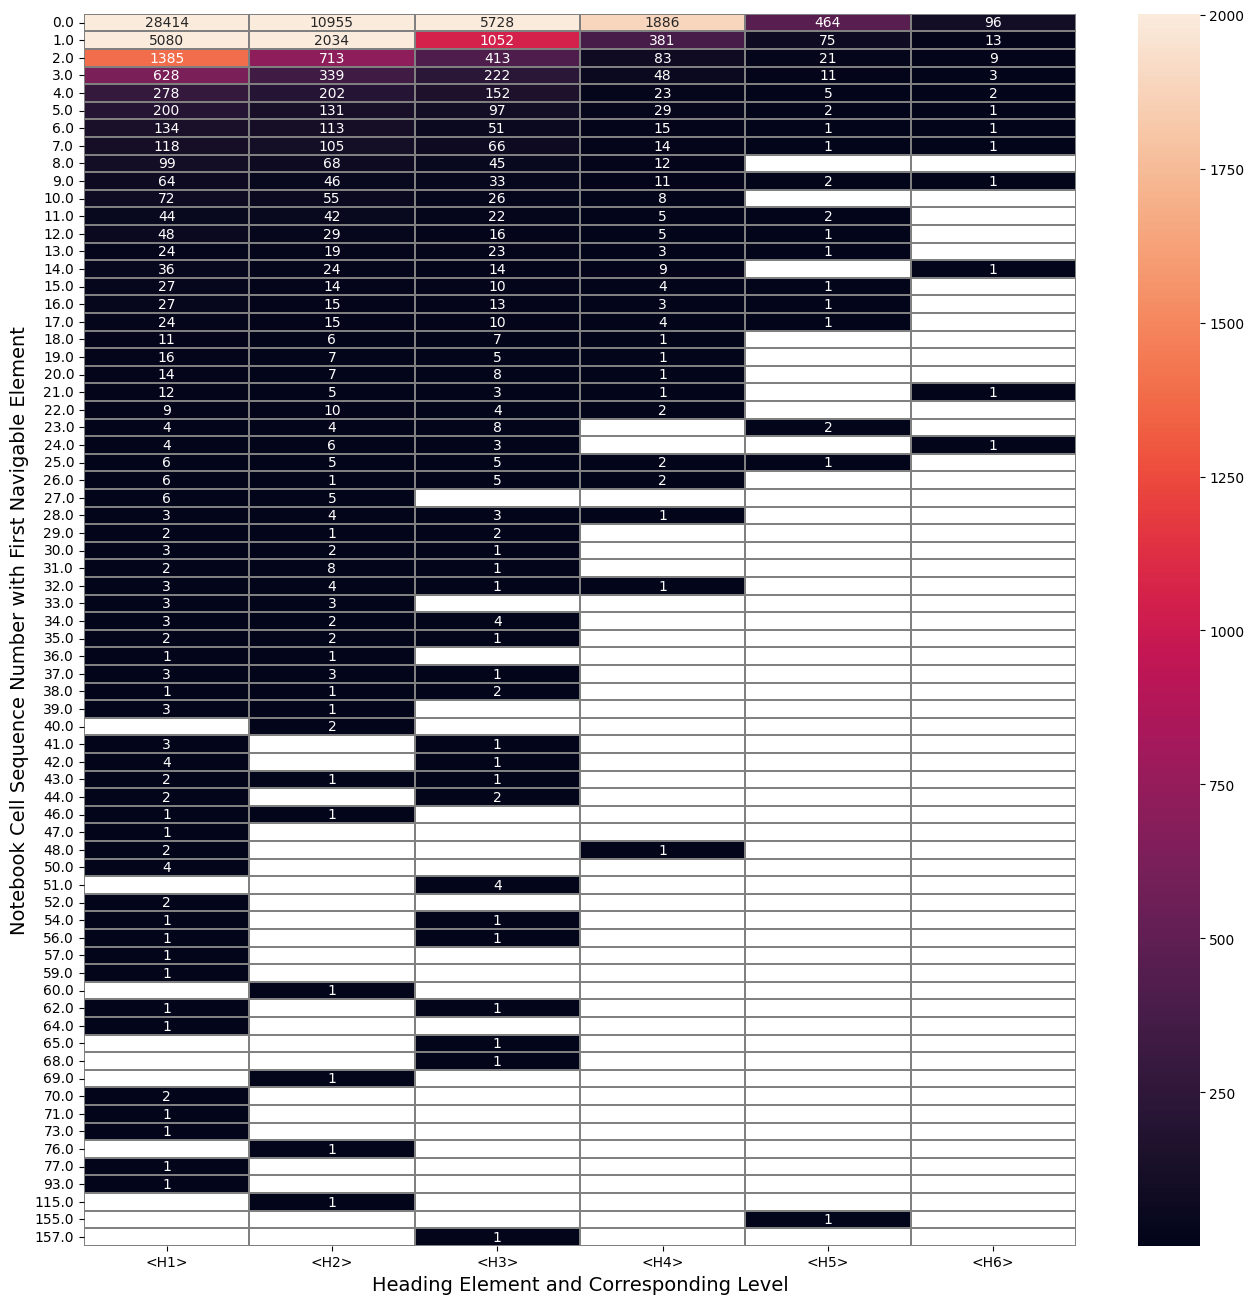

In [24]:
# data.unstack('HLevel').plot(kind='line', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))
g = sns.heatmap(data.unstack('HLevel'),
            linewidth=.1,
#             cmap='gist_ncar',
            mask=data.unstack('HLevel').isnull(),
            annot=True,
            xticklabels=['<H1>', '<H2>', '<H3>', '<H4>', '<H5>', '<H6>'],
            robust=True,
            linecolor='gray',
            fmt='g')
g.set_facecolor('white')
hatches = ["+"]
for hatch, patch in zip(hatches, g.artists):
    patch.set_hatch(hatch)
ax.set_xlabel('Heading Element and Corresponding Level', fontsize=14)
ax.set_ylabel('Notebook Cell Sequence Number with First Navigable Element', fontsize=14)
plt.savefig('submission-figures/hlevel_heatmap_detailed.pdf', bbox_inches='tight')

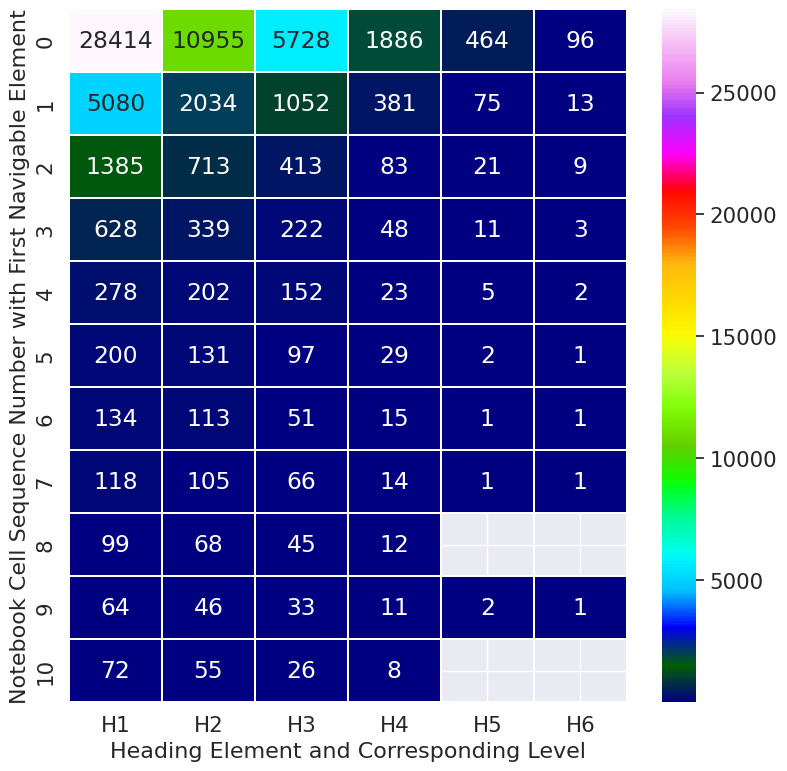

In [28]:
# data.unstack('HLevel').plot(kind='line', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
unstacked_data = data.unstack('HLevel')
sns.set(font_scale=1.4)
unstacked_data = unstacked_data.filter(items=[0,1,2,3,4,5,6,7,8,9,10], axis=0)
# print(unstacked_data.columns)
# print(unstacked_data.index)

sns.heatmap(unstacked_data,
            linewidth=0.01,
            cmap='gist_ncar',
            annot=True,
            mask=False,
#             robust=True,
#             square=True,
            xticklabels=['H1', 'H2', 'H3', 'H4', 'H5', 'H6'],
            fmt='g')
ax.set_xlabel('Heading Element and Corresponding Level', fontsize=16)
ax.set_ylabel('Notebook Cell Sequence Number with First Navigable Element', fontsize=16)
plt.savefig('submission-figures/hlevel_heatmap_top_10.pdf', bbox_inches='tight')

In [8]:
data

SequenceNumber
HLevel SequenceNumber                
1.0    0.0                      28414
       1.0                       5080
       2.0                       1385
       3.0                        628
       4.0                        278
...                               ...
6.0    7.0                          1
       9.0                          1
       14.0                         1
       21.0                         1
       24.0                         1

[212 rows x 1 columns]

Index(['TSequenceNumber'], dtype='object') Float64Index([  0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,
                9.0,  10.0,  11.0,  12.0,  13.0,  14.0,  15.0,  16.0,  17.0,
               18.0,  19.0,  20.0,  21.0,  22.0,  23.0,  24.0,  25.0,  26.0,
               27.0,  28.0,  29.0,  30.0,  31.0,  32.0,  33.0,  34.0,  35.0,
               36.0,  37.0,  38.0,  39.0,  40.0,  41.0,  42.0,  43.0,  44.0,
               45.0,  46.0,  47.0,  48.0,  49.0,  50.0,  51.0,  52.0,  53.0,
               54.0,  55.0,  58.0,  60.0,  61.0,  63.0,  64.0,  65.0,  70.0,
               71.0,  78.0,  86.0,  87.0,  92.0, 103.0, 112.0, 113.0, 118.0,
              145.0, 174.0, 195.0, 232.0, 259.0],
             dtype='float64', name='TSequenceNumber')
{0.0: 1154, 1.0: 2283, 2.0: 2660, 3.0: 1555, 4.0: 930, 5.0: 592, 6.0: 473, 7.0: 359, 8.0: 261, 9.0: 250, 10.0: 174, 11.0: 119, 12.0: 102, 13.0: 103, 14.0: 80, 15.0: 71, 16.0: 63, 17.0: 51, 18.0: 52, 19.0: 37, 20.0: 31, 21.0: 33, 22.0: 32

/tmp/ipykernel_134195/2782176831.py:22: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin=0)


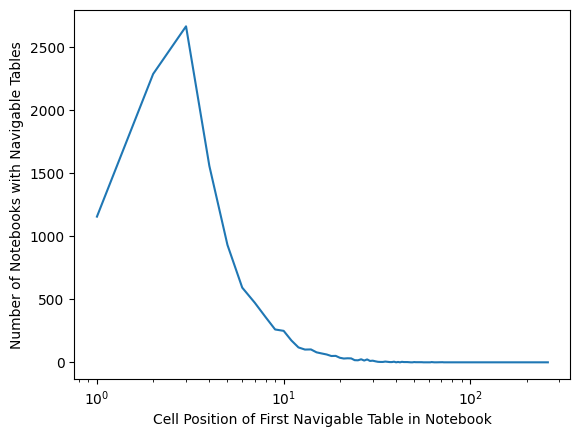

In [9]:
print(table_data.columns, table_data.index)
table_data_dict = {}
for index, row in table_data.iterrows():
    table_data_dict[index] = row['TSequenceNumber']
print(table_data_dict)

index_keys = sorted(table_data_dict.keys())

X = []
Y = []
for k in index_keys:
    X.append(k+1)
    Y.append(table_data_dict[k])
    
print(sum(Y))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(X, Y)
ax.set_ylabel('Number of Notebooks with Navigable Tables')
ax.set_xlabel('Cell Position of First Navigable Table in Notebook')
ax.set_xscale('log')
ax.set_xlim(xmin=0)
plt.savefig('submission-figures/table_notebook_first_position.pdf', bbox_inches='tight')

# Plot Matrix of Headings

This graph provides the matrix/heatmap of headings and their first interactive usage in a map

In [10]:
from collections import defaultdict
import seaborn as sns
from collections import Counter


def process_counter_into_heatmap(item, max_val):
    c = item
    c_keys = sorted(list(c.keys()))
    max_val += 1
    data = [0] * int(max_val)
    for k, v in c.items():
        data[int(k)] = v
    return data


hdf = df[df['H'] == 'Heading'][['SequenceNumber', 'HLevel']]

max_value = hdf.groupby(['HLevel'])['SequenceNumber'].max().max()


hdf_group = hdf.groupby(['HLevel']).agg({'SequenceNumber': list})

hdf_group['C'] = hdf_group['SequenceNumber'].apply(lambda x: dict(Counter(x)))
hdf_group['D'] = hdf_group['C'].apply(lambda r: process_counter_into_heatmap(r, max_value))

# hdf_group = hdf_group.reset_index()[['HLevel', 'D']]
# hdf_group.set_index('HLevel')

fig, ax = plt.subplots(nrows=1, ncols=1)
data = []
for i, r in hdf_group.iterrows():
    data.append(r['D'][:10])
sns.heatmap(numpy.array(data))
plt.show()


# def process_matrix(df):
#     max_sequence_number = int(df['SequenceNumber'].max())
#     heading_level_map = defaultdict(list)
#     for i in range(1, 7):
#         zeros = [0] * max_sequence_number
#         heading_level_map[i] = zeros
        
#     for index, row in df.iterrows():
#         is_heading = (row['H'] == 'Heading')
#         if not is_heading:
#             continue
#         seq_num = int(row['SequenceNumber'])
#         heading_level = int(row['HLevel'])
#         data = heading_level_map[heading_level]
#         data[seq_num - 1] = data[seq_num - 1] + 1
#         heading_level_map[heading_level] = data
    
#     return heading_level_map, max_sequence_number


# def plot_heatmap(heading_level_map, max_sequence_number):
#     fig, ax = plt.subplots(nrows=1, ncols=1)
#     rows = []
#     for heading_level in sorted(heading_level_map.keys()):
#         data_row = heading_level_map[heading_level]
#         rows.append(rows)
#     sns.heatmap(rows)
#     plt.show()
# #     XLabels = numpy.arange(1, max_sequence_number + 1, 1)
# #     YLabels = sorted(heading_level_map.keys())
# #     fig, ax = plt.subplots()
# #     im = ax.imshow(rows)
    
# #     # Show all ticks and label them with the respective list entries
# #     ax.set_xticks(np.arange(len(XLabels)), labels=XLabels)
# #     ax.set_yticks(np.arange(len(YLabels)), labels=YLabels)

# #     # Rotate the tick labels and set their alignment.
# #     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
# #              rotation_mode="anchor")

# #     # Loop over data dimensions and create text annotations.
# #     for i in range(len(YLabels)):
# #         for j in range(len(XLabels)):
# #             text = ax.text(j, i, rows[i, j],
# #                            ha="center", va="center", color="w")

# #     fig.tight_layout()
# #     plt.show()

# hm, max_val = process_matrix(df)
# plot_heatmap(hm, max_val)

KeyError: "None of [Index(['SequenceNumber', 'HLevel'], dtype='object')] are in the [columns]"